Using data from Ives et al. "Single Channel Probe Utilizing the EGN Model to Estimate Link Parameters for Network Abstraction"  
Demonstrate the idea of using the physical model to compensate for areas where we dont have much data, which could be because of data acquisition causing a bottleneck (so data is collected where we expect large variations) or just due to missing data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel as W
from simple_model import simple_model

font = { 'family' : 'sans-serif',
                'weight' : 'normal',
                'size'   : 14}
matplotlib.rc('font', **font)

In [2]:
data_dir = '/Users/joshnevin/physical_gps/david_data/'
snr = np.genfromtxt(open(str(data_dir) + "snr_david.csv", "r"), delimiter=",", dtype =float)
pch = np.genfromtxt(open(str(data_dir) + "power_david.csv", "r"), delimiter=",", dtype =float)

Play around with the amount of data

In [3]:
# snr = snr[:16] # -10 to 5 dBm
# pch = pch[:16] 
snr_comp = snr[:16] # to compare with SSFM
pch_comp = pch[:16] 
snr = snr[1:14]  # -8 to 4 dBm
pch = pch[1:14]  
# snr = snr[3:10] # -6 to 0 dBm  # 3 dBm around peak 
# pch = pch[3:10] 
# snr = snr[1:15] # -9 to 4 dBm  # 2 dB SNR penalty around the peak 
# pch = pch[1:15] 

In [4]:
down_sample_factor = 1
snr = np.array([snr[i] for i in range(len(snr)) if i % down_sample_factor == 0])
pch = np.array([pch[i] for i in range(len(pch)) if i % down_sample_factor == 0])

In [5]:
len(pch)

13

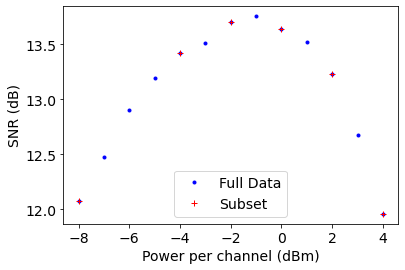

In [152]:
# inds = [0, 4, 8, 12, 15]  # for -10 to 5 dBm
# snr_sub = np.array([snr[inds[0]], snr[inds[1]], snr[inds[2]], snr[inds[3]], snr[inds[4]]])
# pch_sub = np.array([pch[inds[0]], pch[inds[1]], pch[inds[2]], pch[inds[3]], pch[inds[4]]])
# inds = [0, 3, 6, 9, 12]  # for -8 to 4 dBm, five meas.
# snr_sub = np.array([snr[inds[0]], snr[inds[1]], snr[inds[2]], snr[inds[3]], snr[inds[4]]])
# pch_sub = np.array([pch[inds[0]], pch[inds[1]], pch[inds[2]], pch[inds[3]], pch[inds[4]]])
# inds = [0, 4, 8, 12]  # for -8 to 4 dBm, four meas.
# snr_sub = np.array([snr[inds[0]], snr[inds[1]], snr[inds[2]], snr[inds[3]]])
# pch_sub = np.array([pch[inds[0]], pch[inds[1]], pch[inds[2]], pch[inds[3]]])
# inds = [0, 6, 12]  # for -8 to 4 dBm, three meas.
# snr_sub = np.array([snr[inds[0]], snr[inds[1]], snr[inds[2]]])
# pch_sub = np.array([pch[inds[0]], pch[inds[1]], pch[inds[2]]])
# inds = [0, 5, 12]  # for -8 to 4 dBm, three meas. with a priori peak
# snr_sub = np.array([snr[inds[0]], snr[inds[1]], snr[inds[2]]])
# pch_sub = np.array([pch[inds[0]], pch[inds[1]], pch[inds[2]]])
inds = [0, 2, 4, 6, 8, 12]  # for -8 to 4 dBm, six meas.
snr_sub = np.array([snr[inds[0]], snr[inds[1]], snr[inds[2]], snr[inds[3]], snr[inds[4]], snr[inds[5]]])
pch_sub = np.array([pch[inds[0]], pch[inds[1]], pch[inds[2]], pch[inds[3]], pch[inds[4]], pch[inds[5]]])
# inds = [0, 7, 14, -1]  # for -15 to 5 dBm
# snr_sub = np.array([snr[inds[0]], snr[inds[1]], snr[inds[2]], snr[inds[3]]])
# pch_sub = np.array([pch[inds[0]], pch[inds[1]], pch[inds[2]], pch[inds[3]]])
# inds = [0, 3, -1]  # -6 to 0 dBm, three measurements 
# snr_sub = np.array([snr[inds[0]], snr[inds[1]], snr[inds[2]]])
# pch_sub = np.array([pch[inds[0]], pch[inds[1]], pch[inds[2]]])
# inds = [0, 2, 4, -1]  # -6 to 0 dBm, four measurements 
# snr_sub = np.array([snr[inds[0]], snr[inds[1]], snr[inds[2]], snr[inds[3]]])
# pch_sub = np.array([pch[inds[0]], pch[inds[1]], pch[inds[2]], pch[inds[3]]])
# inds = [0, 2, 3, 4, -1]  # -6 to 0 dBm, five measurements 
# snr_sub = np.array([snr[inds[0]], snr[inds[1]], snr[inds[2]], snr[inds[3]], snr[inds[4]]])
# pch_sub = np.array([pch[inds[0]], pch[inds[1]], pch[inds[2]], pch[inds[3]], pch[inds[4]]])
#   # -6 to 0 dBm, seven measurements 
# snr_sub = np.copy(snr)
# pch_sub = np.copy(pch)
# inds = [0, 3, 6, 9, -1]  # for -9 to 4 dBm, five meas.
# snr_sub = np.array([snr[inds[0]], snr[inds[1]], snr[inds[2]], snr[inds[3]], snr[inds[4]]])
# pch_sub = np.array([pch[inds[0]], pch[inds[1]], pch[inds[2]], pch[inds[3]], pch[inds[4]]])
# inds = [0, 4, 8, -1]  # for -9 to 4 dBm, four meas.
# snr_sub = np.array([snr[inds[0]], snr[inds[1]], snr[inds[2]], snr[inds[3]]])
# pch_sub = np.array([pch[inds[0]], pch[inds[1]], pch[inds[2]], pch[inds[3]]])
# inds = [0, 5, -1]  # for -9 to 4 dBm, three meas.
# snr_sub = np.array([snr[inds[0]], snr[inds[1]], snr[inds[2]]])
# pch_sub = np.array([pch[inds[0]], pch[inds[1]], pch[inds[2]]])
plt.plot(pch, snr, 'b.', label='Full Data')
plt.plot(pch_sub, snr_sub, 'r+', label='Subset')
plt.xlabel("Power per channel (dBm)")
plt.ylabel("SNR (dB)")
plt.legend()
plt.show()

**Inputs**: span length [km], operating central wavelength [nm], number of wavelengths, nonlinearity coefficient, dispersion coefficient, loss [db/km], symbol rate [GBd], channel bandwidth [GHz], grid spacing [GHz], EDFA noise figure [dB], number of spans, TRx back to back SNR mean [dB],  TRx back to back SNR standard dev. [dB], random seed

In [7]:
# def gen_phys_targets(model, pch, num_pts_phys):
#     pch_gn = np.linspace(pch[0], pch[-1], num_pts_phys)
#     snr_phys = (model.predict_snr(pch_gn)).reshape(-1,1)
#     return pch_gn, snr_phys
def train_phys_gp(pch, pch_phys, snr, snr_phys, pch_pred):
    pch = pch.reshape(-1, 1)  # needed for SK learn input
    pch_phys = pch_phys.reshape(-1,1)
    pch_pred = pch_pred.reshape(-1,1)
    snr = snr.reshape(-1,1)
    snr_phys = snr_phys.reshape(-1,1)
    kernel_sk = C(1, (1e-5, 1e5)) * RBF(1, (1e-8, 1e5)) +  W(1, (1e-5,1e5))
    gpr_phys = GaussianProcessRegressor(kernel=kernel_sk, n_restarts_optimizer = 20, normalize_y=True)
    gpr_phys.fit_phys(pch, pch_phys, snr, snr_phys)
    mu_sk_phys, std_sk_phys = gpr_phys.predict(pch_pred, return_std=True)
    std_sk_phys = np.reshape(std_sk_phys,(np.size(std_sk_phys), 1)) 
    theta_phys = gpr_phys.kernel_.theta
    lml_phys = gpr_phys.log_marginal_likelihood()
    return mu_sk_phys, std_sk_phys, theta_phys, lml_phys
def train_standard_gp(pch, snr, pch_pred):
    pch = pch.reshape(-1, 1)  # needed for SK learn input
    snr = snr.reshape(-1,1)
    pch_pred = pch_pred.reshape(-1,1)
    kernel_sk = C(1, (1e-5, 1e5)) * RBF(1, (1e-5, 1e5)) +  W(1, (1e-20,1e5))
    gpr = GaussianProcessRegressor(kernel=kernel_sk, n_restarts_optimizer = 20, normalize_y=True)
    gpr.fit(pch, snr)
    mu_sk, std_sk = gpr.predict(pch_pred, return_std=True)
    std_sk = np.reshape(std_sk,(np.size(std_sk), 1)) 
    theta = gpr.kernel_.theta
    lml = gpr.log_marginal_likelihood()
    return mu_sk, std_sk, theta, lml
def convert_to_lin(x):
    return 10**(x/10)
def convert_to_db(x):
    return 10*np.log10(x)
def convert_to_dbm(x):
    return 10*np.log10(x/1e-3)
def convert_to_lin_dbm(x):
    return 1e-3*convert_to_lin(x)
def snr_simple_gen(p_in, a, b, rseed, sig):
        np.random.seed(rseed)
        p_in = p_in + np.random.normal(0, sig, len(p_in))
        p_in = convert_to_lin_dbm(p_in) # W
#         return convert_to_db(1/( (a*p_in**(-1) + b*p_in**2) + 1/29.2  ))
        return convert_to_db(1/( (a*p_in**(-1) + b*p_in**2) + 1/convert_to_lin(14.8)  ))

David's paper: SNR$^{-1}$ = SNR$^{-1}$ + $\mathrm{{SNR}_0}^{-1}$  
$\mathrm{{SNR}_0}=29.2=14.7$dB  
New model: 1/SNR$_{phys}$ = 1/SNR + N(-14.7, 0.01$\times$-14.7)

IDEA: Fit simple model to the SSFM results with initial guesses.

In [8]:
def apply_b2b(snr, b2b):
    return convert_to_db(1/(1/convert_to_lin(snr) + 1/convert_to_lin(b2b)))
# snr_ssfm = [15.77, 17.71, 19.49, 20.76, 20.64, 18.54, 15.09]  
# pch_ssfm = [ -8, -6, -4, -2, 0, 2, 4]
# snr_ssfm = [14.78, 20.94, 15.09]  
# pch_ssfm = [ -9, -1, 4]
snr_ssfm = [19.49, 20.64, 15.09]  
pch_ssfm = [ -4, 0, 4]
#snr_ssfm_m = [apply_b2b(i, convert_to_db(29.2)) for i in snr_ssfm]
snr_ssfm_m = [apply_b2b(i, convert_to_db(convert_to_lin(14.8))) for i in snr_ssfm]

In [9]:
sim_model = simple_model()

In [10]:
snr_ssfm = np.array(snr_ssfm)
pch_ssfm = np.array(pch_ssfm)
snr_ssfm_m = np.array(snr_ssfm_m)

In [11]:
opt_vals = sim_model.fit(pch_ssfm.reshape(len(pch_ssfm),), snr_ssfm.reshape(len(snr_ssfm),),
                         init_guess = np.array([1e-5, 1e3]))

In [12]:
a_opt, b_opt = opt_vals[0]
pch_sim_comp = np.linspace(pch[0], pch[-1], 30)
snr_sim = snr_simple_gen(pch_sim_comp, a_opt, b_opt, 1, 0.5/3)
print(a_opt)
print(b_opt)

4.175696351100312e-06
4496.438144330627


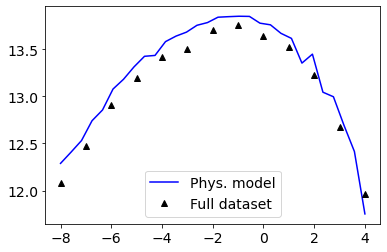

In [13]:
plt.plot(pch_sim_comp, snr_sim, 'b-', label='Phys. model')
plt.plot(pch, snr, 'k^', label='Full dataset')
#plt.plot(pch_ssfm, snr_ssfm_m, 'r*', label='SSFM')
plt.legend() 
plt.show()

In [14]:
#pch_pred_phys = np.linspace(pch[-1], pch[0], 100)
pch_pred_phys = np.copy(pch)
snr_phys_ensemble = []
for i in range(5):
    snr_phys_ensemble.append(snr_simple_gen(pch_pred_phys, a_opt, b_opt, i, 0.5/3))

In [15]:
snr_phys_ensemble_ave = np.mean(snr_phys_ensemble, axis=0)

Take peak physical model SNR prediction, calculate the power that corresponds to a 2 dB penalty either side

In [16]:
pch_peak_search = np.linspace(pch[-1], pch[0], 100)
snr_pk = max(snr_simple_gen(pch_peak_search, a_opt, b_opt, i, 1e-3))
snr_pk - 2.0

11.850822231638471

In [17]:
print(snr[0])  # high power max 
print(pch[0])

11.9585323936485
4.0


In [18]:
print(snr[-1])  # low power min
print(pch[-1])

12.0792581047977
-8.0


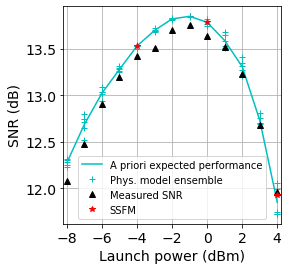

In [19]:
f, ax = plt.subplots()
plt.plot(pch_pred_phys, snr_phys_ensemble_ave, 'c-', label='A priori expected performance')
plt.plot(pch_pred_phys, snr_phys_ensemble[0], 'c+', label='Phys. model ensemble')
plt.plot(pch_pred_phys, snr_phys_ensemble[1], 'c+')
plt.plot(pch_pred_phys, snr_phys_ensemble[2], 'c+')
plt.plot(pch_pred_phys, snr_phys_ensemble[3], 'c+')
plt.plot(pch_pred_phys, snr_phys_ensemble[4], 'c+')
plt.plot(pch, snr, 'k^', label='Measured SNR')
plt.plot(pch_ssfm, snr_ssfm_m, 'r*', label='SSFM')
#plt.xlim([pch[-1], pch[0]])
plt.xlim([-8.2, 4.2])
plt.xticks([-8, -6, -4, -2, 0, 2, 4])
#plt.xticks([-9, -7, -5, -3, -1, 1, 3, 4])
#plt.ylim([13, 14])
plt.xlabel("Launch power (dBm)")
plt.ylabel("SNR (dB)")
plt.legend(prop={'size':10})
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
f.patch.set_facecolor('w')
plt.grid()
#plt.savefig('figures/SSFM_phys_model_meas_comp.pdf', dpi=200,bbox_inches='tight')
plt.show()

Compute model error w.r.t. full dataset:

In [20]:
mse_phys_model = np.mean(((snr - snr_phys_ensemble_ave)**2)**0.5)
mse_phys_model

0.12163204553346701

In [48]:
num_pts_phys = 15

In [49]:
pch_gn_david = np.linspace(pch[0], pch[-1], num_pts_phys)
snr_gn_david = snr_simple_gen(pch_gn_david, a_opt, b_opt, 1, 0.5/3)

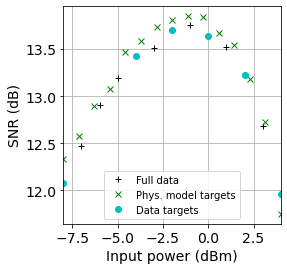

In [50]:
f, ax = plt.subplots()
plt.plot(pch, snr, 'k+', label='Full data')
plt.plot(pch_gn_david, snr_gn_david, 'gx', label='Phys. model targets')
plt.plot(pch_sub, snr_sub, 'co', label='Data targets')
plt.xlim([pch[-1], pch[0]])
#plt.yticks([10,10.5,11,11.5,12, 12.5, 13, 13.5])
#plt.ylim([12, 13.6])
plt.xlabel("Input power (dBm)")
plt.ylabel("SNR (dB)")
plt.legend(prop={'size':10})
plt.grid()
f.patch.set_facecolor('w')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
#plt.savefig('figures/powershifted_gn_comparison.pdf', dpi=200,bbox_inches='tight')
plt.show()

Plot the physical model against measured data.

In [134]:
# snr_sub = snr
# pch_sub = pch

In [75]:
pch_test = np.copy(pch_gn_david).reshape(-1,1)
snr_phys_test = np.copy(snr_gn_david).reshape(-1,1)
#pch_pred = np.linspace(pch[0], pch[-1], 100)
pch_pred = np.arange(pch[-1], pch[0]+0.1, 0.1)

In [161]:
# pch_r1 = pch_sub[1:]
# snr_r1 = snr_sub[1:]
pch_r1 = pch_sub[:-1]
snr_r1 = snr_sub[:-1]
pch_r1

array([ 4.,  2.,  0., -2., -4.])

In [162]:
mu_sk_phys, std_sk_phys, theta_phys, lml_phys = train_phys_gp(pch_r1, pch_test, snr_r1, snr_phys_test, pch_pred)
mu_sk_p2_phys = mu_sk_phys + 2*std_sk_phys 
mu_sk_n2_phys = mu_sk_phys - 2*std_sk_phys 
print(np.exp(theta_phys))

[8.55314373 3.80220327 0.0118289 ]


In [163]:
mu_sk, std_sk, theta, lml = train_standard_gp(pch_r1, snr_r1, pch_pred)
mu_sk_p2 = mu_sk + 2*std_sk 
mu_sk_n2 = mu_sk - 2*std_sk 
print(np.exp(theta))

[1.71180389 2.87509464 0.09874129]


In [164]:
mu_sk_f, std_sk_f, theta_f, lml_f = train_standard_gp(pch, snr, pch_pred)
mu_sk_p2_f = mu_sk_f + 2*std_sk_f 
mu_sk_n2_f = mu_sk_f - 2*std_sk_f 
print(np.exp(theta_f))

[1.52049797e+01 4.98173122e+00 4.61540177e-03]


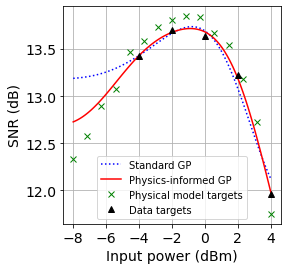

In [165]:
f, ax = plt.subplots()
ax.plot(pch_pred, mu_sk, 'b:', label = 'Standard GP')
#ax.plot(pch_pred, mu_sk_f, 'g--', label = 'Standard GP all data')
ax.plot(pch_pred, mu_sk_phys, 'r-', label = 'Physics-informed GP')
ax.plot(pch_test, snr_phys_test, 'gx', label = 'Physical model targets')
ax.plot(pch_r1, snr_r1,'k^', label = 'Data targets')
#ax.plot(pch_shifted, snr,'k+', label='Full data set')
#plt.xlim([pch[0]-0.05, pch[-1]+0.05])
#plt.xticks([-2.5, -1, 0.5, 2, 3.5 ])
plt.xticks([-8, -6, -4, -2, 0, 2, 4 ])
plt.xlabel("Input power (dBm)")
plt.ylabel("SNR (dB)")
#plt.title("Predictive mean comparison")
plt.legend(prop={'size':10})
plt.grid()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
f.patch.set_facecolor('w')
#plt.savefig('figures/rev_1_sixmeas_m1_lin.pdf', dpi=200,bbox_inches='tight')
#plt.savefig('figures/rev_1_fulldataset_m1_nonlin.pdf', dpi=200,bbox_inches='tight')
plt.show()

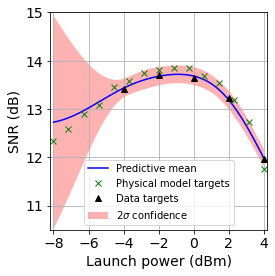

In [169]:
f, ax = plt.subplots()
ax.plot(pch_pred, mu_sk_phys, 'b-', label = 'Predictive mean')
#ax.plot(pch_shifted, snr,'k+', label = 'All data')
ax.plot(pch_test, snr_phys_test, 'gx', label = 'Physical model targets')
ax.plot(pch_r1, snr_r1,'k^', label = 'Data targets')
#ax.plot(pch_shifted, phys_model_snr_plt, 'k:', label = 'Phys. model')
ax.fill(np.concatenate([pch_pred, pch_pred[::-1]]),
            np.concatenate([mu_sk_p2_phys,
                            (mu_sk_n2_phys)[::-1]]),
            alpha=0.3, fc='r', ec='None', label='2$\sigma$ confidence')
#plt.xlim([pch[-1], pch[0]])
plt.xlim([-8.2, 4.2])
plt.ylim([10.5, 15.])
plt.xticks([-8, -6, -4, -2, 0, 2, 4])
#plt.xticks([-9, -7, -5, -3, -1, 1, 3, 4])
#plt.xticks([-10, -7.5, -5, -2.5, 0, 2.5, 5 ])
#plt.xticks([-6, -4, -2, 0, 2, 4])
plt.xlabel("Launch power (dBm)")
plt.ylabel("SNR (dB)")
plt.grid()
#plt.title("Physics-enhanced GP")
plt.legend(prop={'size':10},loc="lower center")
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
f.patch.set_facecolor('w')
#plt.grid()
#plt.savefig('figures/rev_1_sixmeas_m1_lin_pigp.pdf', dpi=200,bbox_inches='tight')
#plt.savefig('figures/rev_1_fulldataset_m1_nonlin_pigp.pdf', dpi=200,bbox_inches='tight')
plt.show()

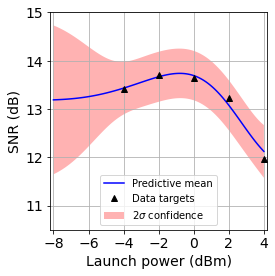

In [170]:
f, ax = plt.subplots()
ax.plot(pch_pred, mu_sk, 'b-', label = 'Predictive mean')
#ax.plot(pch_shifted, snr,'k+', label = 'All data')
ax.plot(pch_r1, snr_r1,'k^', label = 'Data targets')
ax.fill(np.concatenate([pch_pred, pch_pred[::-1]]),
            np.concatenate([mu_sk_p2,
                            (mu_sk_n2)[::-1]]),
            alpha=0.3, fc='r', ec='None', label='2$\sigma$ confidence')
#plt.xlim([pch[-1], pch[0]])
plt.xlim([-8.2, 4.2])
plt.xticks([-8, -6, -4, -2, 0, 2, 4])
#plt.xticks([-10, -7.5, -5, -2.5, 0, 2.5, 5 ])
#plt.xticks([-9, -7, -5, -3, -1, 1, 3, 4])
#plt.ylim([11.3,14.5])
plt.ylim([10.5, 15.])
#plt.ylim([11.5, 14.1])
plt.grid()
plt.xlabel("Launch power (dBm)")
plt.ylabel("SNR (dB)")
#plt.title("Normal GP")
plt.legend(prop={'size':10},loc="lower center")
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
f.patch.set_facecolor('w')
#plt.savefig('figures/rev_1_sixmeas_m1_lin_sgp.pdf', dpi=200,bbox_inches='tight')
#plt.savefig('figures/rev_1_fulldataset_m1_nonlin_sgp.pdf', dpi=200,bbox_inches='tight')
plt.show()

In [47]:
#GN_pred_mean = np.genfromtxt(open("shared_data/GN_mu_sk_phys_initbtb.csv", "r"), delimiter=",", dtype =float)

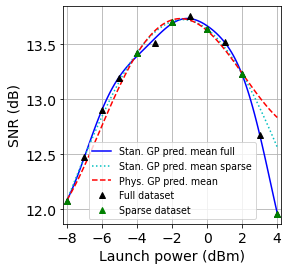

In [48]:
f, ax = plt.subplots()
ax.plot(pch_pred, mu_sk_f, 'b-', label = 'Stan. GP pred. mean full')
ax.plot(pch_pred, mu_sk, 'c:', label = 'Stan. GP pred. mean sparse')
ax.plot(pch_pred, mu_sk_phys, 'r--', label = 'Physi GP pred. mean')
#ax.plot(pch, GN_pred_mean, 'c:', label = 'GN GP pred. mean')
ax.plot(pch, snr,'k^', label = 'Full dataset')
ax.plot(pch_sub, snr_sub,'g^', label = 'Sparse dataset')
# ax.fill(np.concatenate([pch, pch[::-1]]),
#             np.concatenate([mu_sk_p2_f,
#                             (mu_sk_n2_f)[::-1]]),
#             alpha=0.3, fc='r', ec='None', label='2$\sigma$ confidence')
#plt.xlim([pch[-1], pch[0]])
plt.xlim([-8.2, 4.2])
#plt.xticks([-10, -7.5, -5, -2.5, 0, 2.5, 5 ])
plt.xticks([-8, -6, -4, -2, 0, 2, 4])
#plt.xticks([-9, -7, -5, -3, -1, 1, 3, 4])
#plt.ylim([11.8,14])
#plt.xticks([-2.5, -1, 0.5, 2, 3.5 ])
#plt.xticks([-6, -4, -2, 0, 2, 4 ])
plt.xlabel("Launch power (dBm)")
plt.ylabel("SNR (dB)")
#plt.title("Normal GP")
plt.legend(prop={'size':9.5})
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
f.patch.set_facecolor('w')
plt.grid()
#plt.savefig('figures/david_comp_standard_gp_full_ppert.pdf', dpi=200,bbox_inches='tight')
#plt.savefig('figures/final_comp_stan_gp_full.pdf', dpi=200,bbox_inches='tight')
#plt.savefig('figures/final_comp_stan_gp_full3.pdf', dpi=200,bbox_inches='tight')
#plt.savefig('figures/final_comp_stan_gp_full6.pdf', dpi=200,bbox_inches='tight')
plt.show()

Compare MSE w.r.t. data for the physical model enhanced GP trained on subset of the data and standard GP trained on full dataset.

Make predictions only at data points to compute MSE

In [341]:
gp_phys_pred, gp_phys_pred_std, _, _ = train_phys_gp(pch_sub, pch_test, snr_sub, snr_phys_test, pch)
gp_pred_f, gp_pred_std_f, _, _ = train_standard_gp(pch, snr, pch)
gp_pred, gp_pred_std, _, _ = train_standard_gp(pch_sub, snr_sub, pch)

In [342]:
mse_phys = np.mean(((snr - gp_phys_pred)**2)**0.5)

In [343]:
mse_stan_f = np.mean(((snr - gp_pred_f)**2)**0.5)

In [344]:
mse_stan = np.mean(((snr - gp_pred)**2)**0.5)

In [345]:
100*(mse_phys - mse_stan_f)/mse_stan_f

8.994551883934848

MSE difference in dB - way below 0.1 dB, which is the smallest level people care about in power budgets.

In [346]:
mse_phys - mse_stan_f

0.058637808963231786

In [347]:
mse_stan - mse_stan_f

0.08629617705720238

Relative change in the predictive std compared to full dataset SGP (%):

In [348]:
100*(np.mean(gp_phys_pred_std) - np.mean(gp_pred_std_f))/np.mean(gp_pred_std_f)

1096.887783507713

Relative change in the predictive std compared to subset SGP (%):

In [349]:
100*(np.mean(gp_phys_pred_std) - np.mean(gp_pred_std))/np.mean(gp_pred_std)

-5.141649982106291

In [350]:
(0.12 - 0.19)/0.19

-0.368421052631579

In [351]:
np.mean(gp_pred_std)

0.6061280026373862

In [352]:
0.61/0.13

4.692307692307692

RMSD of the predictive mean of the model with and without physical models:

In [353]:
np.mean(((mu_sk_f - mu_sk_phys)**2)**0.5)

0.2735243310432738

Mean relative difference (%):

In [354]:
np.mean(100*(mu_sk_f - mu_sk_phys)/mu_sk_f)

1.9935985250291521

In [355]:
np.exp(theta_f)  # mu, l, sigma: kernel specified as mu**2 * RBF(l**2) + I sigma**2 

array([1.52049704e+01, 4.98173112e+00, 4.61540319e-03])

In [356]:
np.exp(theta_phys)

array([4.31159654, 3.08430256, 0.01151513])